# Testing Neural Network

In [19]:
# importing libraries

from neural_network import *
import matplotlib.pyplot as plt

### Initializing Scatater Plot Data

[]

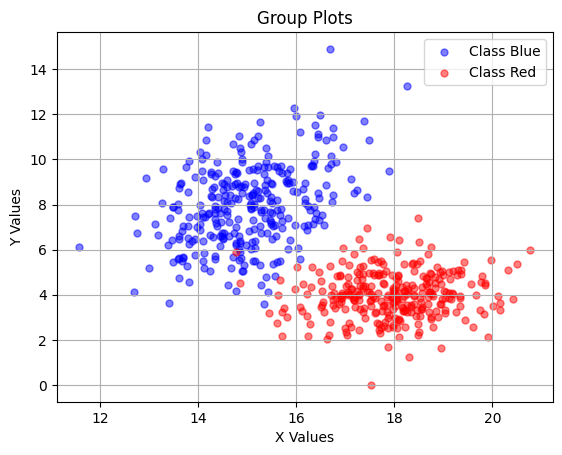

In [20]:
mean_1 = [15, 8]
covariance_1 = [
    [1, 0.5],
    [0.5, 3]
]

mean_2 = [18, 4]
covariance_2 = [
    [1, 0],
    [0, 1]
]

num_points = 300

# generating data
data_1 = np.random.multivariate_normal(mean_1, covariance_1, num_points)
data_2 = np.random.multivariate_normal(mean_2, covariance_2, num_points)

# separate x and y
x_1 = data_1[:, 0]
y_1 = data_1[:, 1]

x_2 = data_2[:, 0]
y_2 = data_2[:, 1]

# creating scatter plot
plt.scatter(x_1, y_1, alpha=0.5, s=25, color='blue', label='Class Blue')
plt.scatter(x_2, y_2, alpha=0.5, s=25, color='red', label='Class Red')

plt.title('Group Plots')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.grid(True)
plt.legend(loc='upper right')

plt.plot()

### Data Prep

In [21]:
# combining x & y values
combined_1 = [[x_1[i], y_1[i]] for i in range(len(x_1))]
combined_2 = [[x_2[i], y_2[i]] for i in range(len(x_2))]

# creating our data set for our neural network
inputs = []
actual_values = []

for i in range(len(combined_1)):
    # adding data from group Blue
    inputs.append(combined_1[i])
    actual_values.append([[1]])
for i in range(len(combined_2)):
    # adding data from group Red
    inputs.append(combined_2[i])
    actual_values.append([[0]])



for i in range(10):
    print(f'{inputs[i]} ==> {actual_values[i]}')
print('='*80)
for i in range(295, 305):
    print(f'{inputs[i]} ==> {actual_values[i]}')
print('='*80)
for i in range(400, 410):
    print(f'{inputs[i]} ==> {actual_values[i]}')

[np.float64(14.084254248980274), np.float64(7.609593005044509)] ==> [[1]]
[np.float64(16.065391107250615), np.float64(11.230147633910953)] ==> [[1]]
[np.float64(16.34941713549908), np.float64(7.143548592299503)] ==> [[1]]
[np.float64(15.080926422766806), np.float64(8.091076050955618)] ==> [[1]]
[np.float64(14.098375757464279), np.float64(7.467608243855591)] ==> [[1]]
[np.float64(13.77649500498807), np.float64(5.297966183581633)] ==> [[1]]
[np.float64(16.180029735331907), np.float64(8.083540678872199)] ==> [[1]]
[np.float64(14.86735080912634), np.float64(8.838052597895546)] ==> [[1]]
[np.float64(16.146422692833134), np.float64(8.690119069440096)] ==> [[1]]
[np.float64(13.636430046442289), np.float64(8.91156425976224)] ==> [[1]]
[np.float64(15.289466386811078), np.float64(7.660090308843241)] ==> [[1]]
[np.float64(15.204299648798616), np.float64(9.53971617990552)] ==> [[1]]
[np.float64(15.118302838549573), np.float64(7.331263929754442)] ==> [[1]]
[np.float64(13.596782543980558), np.float6

### Training Neural Network

In [22]:
alpha = 0.1
epochs = 200
regularization = 'L2'
lambda_const = 0.15

nn1 = Neural_Network(
    input_layer_num_nodes=2,
    hidden_layer_dimensions=[8],
    output_layer_dimensions=[1],
    alias='nn1',
    activation_functions=[relu, sigmoid],
    weight_normalizations=[he_normal, xavier_normal]
)

nn1.multi_run_learn_data(
    input_list=inputs, 
    expected_list=actual_values, 
    learning_rate=alpha, 
    epochs=epochs,
    regularization=regularization,
    lambda_const=lambda_const
)

In [23]:
# classifying each data point into either group Blue (1) or Red (0)
predict_values = []

for i in range(len(inputs)):
    predict_value = nn1.get_output(inputs[i])

    # collapsing float to a binary output
    if predict_value[0] < 0.5:
        predict_value[0] = 0
    else:
        predict_value[0] = 1

    predict_values.append([predict_value])



for i in range(10):
    print(f'{inputs[i]} ==> predict {predict_values[i][0]} vs actual {actual_values[i][0]}')
print('='*80)
for i in range(295, 305):
    print(f'{inputs[i]} ==> predict {predict_values[i][0]} vs actual {actual_values[i][0]}')
print('='*80)
for i in range(400, 410):
    print(f'{inputs[i]} ==> predict {predict_values[i][0]} vs actual {actual_values[i][0]}')

[np.float64(14.084254248980274), np.float64(7.609593005044509)] ==> predict [1] vs actual [1]
[np.float64(16.065391107250615), np.float64(11.230147633910953)] ==> predict [1] vs actual [1]
[np.float64(16.34941713549908), np.float64(7.143548592299503)] ==> predict [1] vs actual [1]
[np.float64(15.080926422766806), np.float64(8.091076050955618)] ==> predict [1] vs actual [1]
[np.float64(14.098375757464279), np.float64(7.467608243855591)] ==> predict [1] vs actual [1]
[np.float64(13.77649500498807), np.float64(5.297966183581633)] ==> predict [1] vs actual [1]
[np.float64(16.180029735331907), np.float64(8.083540678872199)] ==> predict [1] vs actual [1]
[np.float64(14.86735080912634), np.float64(8.838052597895546)] ==> predict [1] vs actual [1]
[np.float64(16.146422692833134), np.float64(8.690119069440096)] ==> predict [1] vs actual [1]
[np.float64(13.636430046442289), np.float64(8.91156425976224)] ==> predict [1] vs actual [1]
[np.float64(15.289466386811078), np.float64(7.660090308843241)]

### Evaluating Neural Network Training

In [24]:
correct_x_coord = []
correct_y_coord = []

incorrect_x_coord = []
incorrect_y_coord = []

# comparing predict vs actual and putting into the corresponding bucket
for i in range(len(predict_values)):
    if predict_values[i][0] == actual_values[i][0]:
        # correct classification
        correct_x_coord.append(inputs[i][0])
        correct_y_coord.append(inputs[i][1])
    else:
        # incorrect classification
        incorrect_x_coord.append(inputs[i][0])
        incorrect_y_coord.append(inputs[i][1])

In [25]:
print(f'Num Correct: {len(correct_x_coord)} [{100*len(correct_x_coord) / (2*num_points)}%]')
print(f'Num Incorrect: {len(incorrect_x_coord)} [{100*len(incorrect_x_coord) / (2*num_points)}%]')

Num Correct: 572 [95.33333333333333%]
Num Incorrect: 28 [4.666666666666667%]


[]

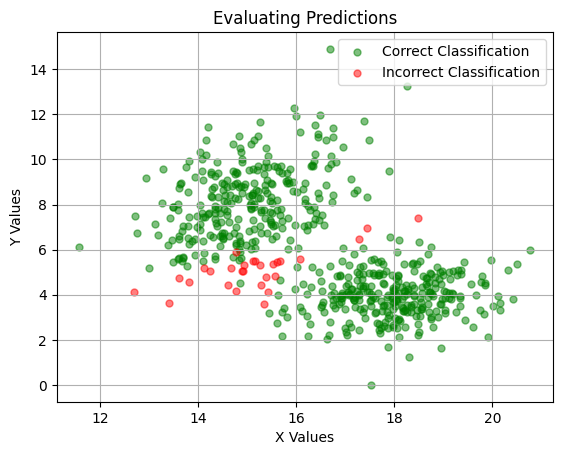

In [26]:
plt.scatter(correct_x_coord, correct_y_coord, alpha=0.5, s=25, color='green', label='Correct Classification')
plt.scatter(incorrect_x_coord, incorrect_y_coord, alpha=0.5, s=25, color='red', label='Incorrect Classification')

plt.title('Evaluating Predictions')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.grid(True)
plt.legend(loc='upper right')

plt.plot()

In [27]:
print(nn1.hidden_layers[0].get_weights_matrix())
print(nn1.output_layers[0].get_weights_matrix())

[[-1.79253645e-03  4.21340280e-04]
 [ 1.92092257e-01 -2.58333758e-01]
 [-2.45066062e-03 -7.55623989e-04]
 [-1.75914882e-03  8.53787422e-04]
 [ 4.67901886e-06 -6.48320803e-04]
 [-7.05079353e-02  4.11316827e-01]
 [-1.70099322e-04 -1.66852653e-03]
 [-8.37762845e-04 -8.02379826e-04]]
[[-0.00123371 -0.32185228 -0.00375314  0.00165229  0.00280536  0.41853923
  -0.00222403 -0.00242165]]
